In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# 1. Read Data

In [2]:
url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"

small_noise_url_suffix = "artificialNoAnomaly/art_daily_small_noise.csv"
small_noise_url = url_root + small_noise_url_suffix
df_small_noise = pd.read_csv(small_noise_url)

<AxesSubplot:>

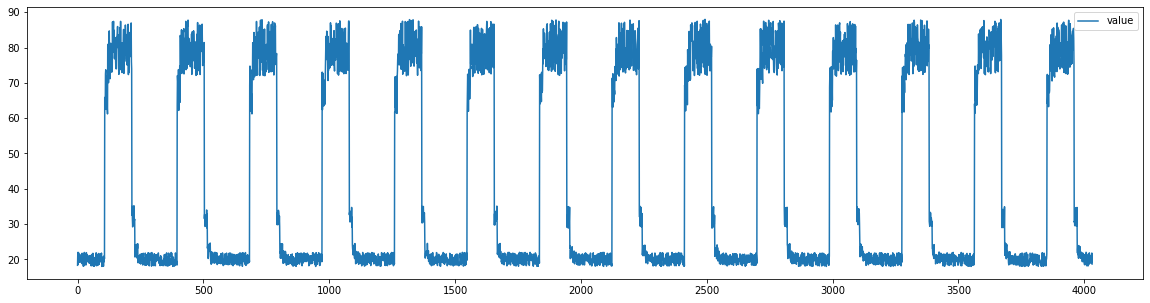

In [3]:
df_small_noise.plot(figsize=(20,5))

# 2. Filling Data Gaps

In [4]:
data_gaps = [
    [
        "2014-04-08 08:00:00.000000",
        "2014-04-08 15:00:00.000000"
    ]
]

## 2.1. Create Data Gap

In [5]:
df_small_noise_gap = (df_small_noise['timestamp'] >  data_gaps[0][0]) & \
                     (df_small_noise['timestamp'] <= data_gaps[0][1])

In [6]:
df_small_noise_cpy = df_small_noise.copy()
df_small_noise_cpy.loc[df_small_noise_gap] = np.nan

<AxesSubplot:>

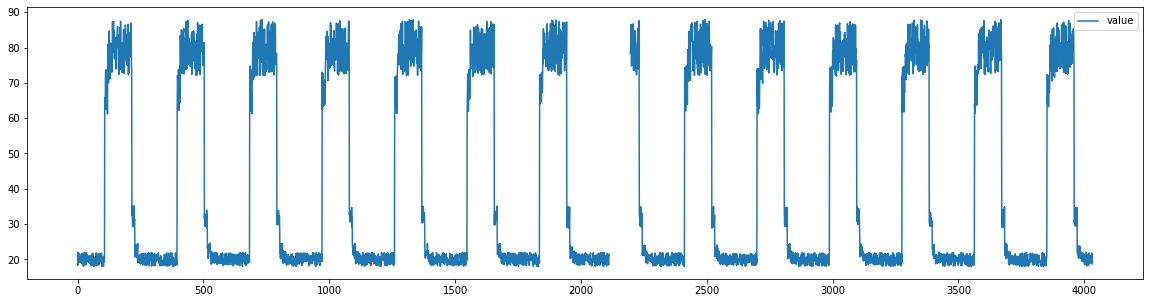

In [7]:
df_small_noise_cpy.plot(figsize=(20,5))

In [8]:
df_small_noise_cpy.isna().sum()

timestamp    84
value        84
dtype: int64

In [9]:
report = {'bfill': [], 'ffill': [], 'fmedian': [], 'interpolate': []}

## 2.2. Back-fill

In [10]:
df_small_noise_reconstructed_bfill = df_small_noise_cpy.fillna(method='bfill')

<AxesSubplot:>

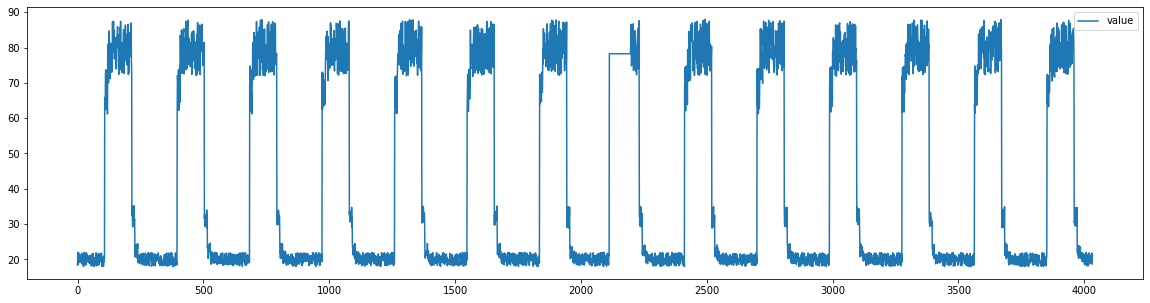

In [11]:
df_small_noise_reconstructed_bfill.plot(figsize=(20,5))

### Errors

In [12]:
mae_bfill = mean_absolute_error(df_small_noise.loc[df_small_noise_gap].value, 
                                df_small_noise_reconstructed_bfill.loc[df_small_noise_gap].value)

In [13]:
mae_bfill

12.295359607023814

In [14]:
report['bfill'].append(mae_bfill)

In [15]:
mape_bfill = mean_absolute_percentage_error(df_small_noise.loc[df_small_noise_gap].value, 
                                            df_small_noise_reconstructed_bfill.loc[df_small_noise_gap].value)

In [16]:
mape_bfill

0.4577040064466748

In [17]:
report['bfill'].append(mape_bfill)

## 2.3. Forward Fill

In [18]:
df_small_noise_reconstructed_ffill = df_small_noise_cpy.fillna(method='ffill')

<AxesSubplot:>

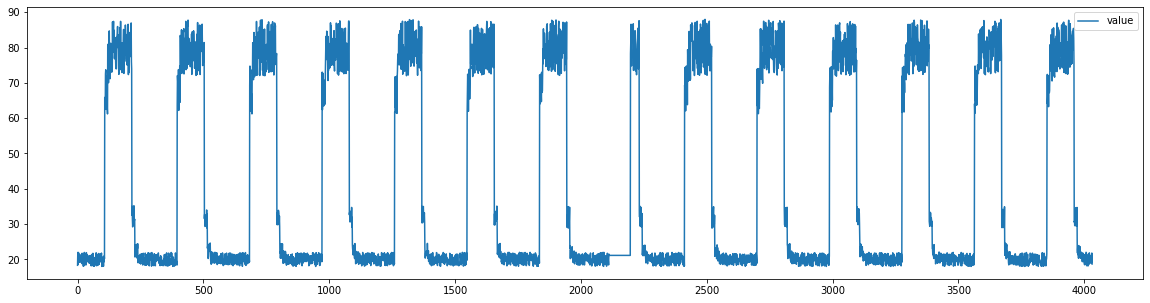

In [19]:
df_small_noise_reconstructed_ffill.plot(figsize=(20,5))

### Errors

In [20]:
mae_ffill = mean_absolute_error(df_small_noise.loc[df_small_noise_gap].value, 
                                df_small_noise_reconstructed_ffill.loc[df_small_noise_gap].value)

In [21]:
mae_ffill

48.50292471536429

In [22]:
report['ffill'].append(mae_ffill)

In [23]:
mape_ffill = mean_absolute_percentage_error(df_small_noise.loc[df_small_noise_gap].value, 
                                            df_small_noise_reconstructed_ffill.loc[df_small_noise_gap].value)

In [24]:
mape_ffill

0.6398952792693642

In [25]:
report['ffill'].append(mape_ffill)

## 2.4. Fill Median

In [26]:
mean_value = df_small_noise_cpy.value.mean()

In [27]:
print(mean_value)

41.86898149767739


In [28]:
df_small_noise_reconstructed_mean = df_small_noise_cpy.fillna(mean_value)

<AxesSubplot:>

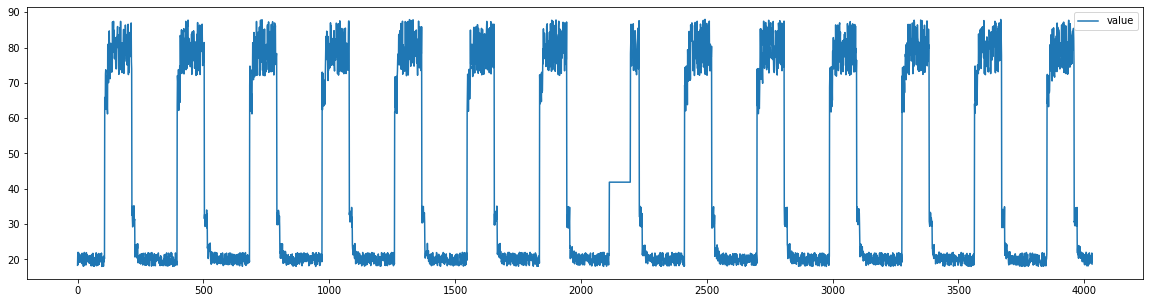

In [29]:
df_small_noise_reconstructed_mean.plot(figsize=(20,5))

### Errors

In [30]:
mae_fmedian = mean_absolute_error(df_small_noise.loc[df_small_noise_gap].value, 
                                  df_small_noise_reconstructed_mean.loc[df_small_noise_gap].value)

In [31]:
mae_fmedian

33.182003518011925

In [32]:
report['fmedian'].append(mae_fmedian)

In [33]:
mape_fmedian = mean_absolute_percentage_error(df_small_noise.loc[df_small_noise_gap].value, 
                                              df_small_noise_reconstructed_mean.loc[df_small_noise_gap].value)

In [34]:
mape_fmedian

0.5421247873157795

In [35]:
report['fmedian'].append(mape_fmedian)

## 2.5. Interpolate

In [36]:
df_small_noise_reconstructed_interpolate = df_small_noise_cpy.copy()

In [37]:
df_small_noise_reconstructed_interpolate = df_small_noise_reconstructed_interpolate.interpolate()

<AxesSubplot:>

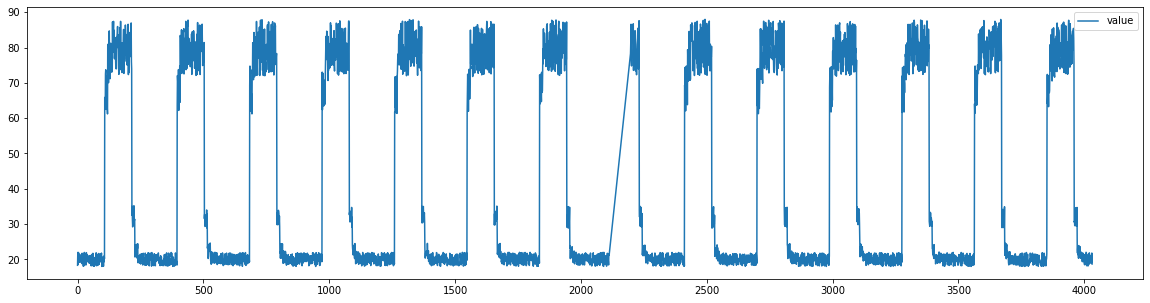

In [38]:
df_small_noise_reconstructed_interpolate.plot(figsize=(20,5))

### Errors

In [39]:
mae_interp = mean_absolute_error(df_small_noise.loc[df_small_noise_gap].value, 
                                 df_small_noise_reconstructed_interpolate.loc[df_small_noise_gap].value)

In [40]:
mae_interp

21.070943993819967

In [41]:
report['interpolate'].append(mae_interp)

In [42]:
mape_interp = mean_absolute_percentage_error(df_small_noise.loc[df_small_noise_gap].value, 
                                             df_small_noise_reconstructed_interpolate.loc[df_small_noise_gap].value)

In [43]:
mape_interp

0.30763075918154625

In [44]:
report['interpolate'].append(mape_interp)

## 2.6. Compare Methods

In [45]:
err = pd.DataFrame.from_dict(report, 
                             columns=['Mean Absolute Error', 'Mean Absolute Relative Error'],
                             orient='index')

In [46]:
err.head()

,Mean Absolute Error,Mean Absolute Relative Error
bfill,12.295360,0.457704
ffill,48.502925,0.639895
fmedian,33.182004,0.542125
interpolate,21.070944,0.307631


<AxesSubplot:>

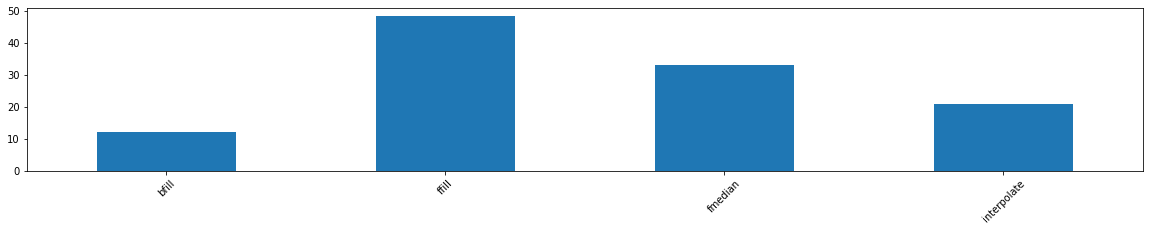

In [47]:
err['Mean Absolute Error'].plot(figsize=(20, 3), kind='bar', rot=45)

<AxesSubplot:>

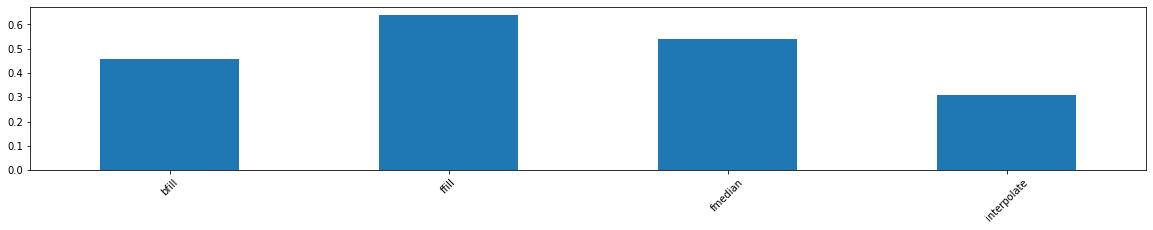

In [48]:
err['Mean Absolute Relative Error'].plot(figsize=(20, 3), kind='bar', rot=45)